In [84]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import PlaceCellAnalysis as pc
from astropy.convolution import convolve, Gaussian1DKernel

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# load a session where a know there is the right number of TTLs
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
mouse = '4139219.2'

# for mouse in  ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5',
#      '4139251.1','4139251.2','4139260.1','4139260.2','4139261.2','4139266.3','4139265.4']:

    

4139219.2
MouseName                                                4139219.2
DateFolder                                              08_10_2018
SessionNumber                                                    1
Track                                           TwoTower_noTimeout
RewardCount                                                     63
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2018-10-08 00:00:00
data file        G:\My Drive\\VR_Data\TwoTower\4139219.2\08_10_...
scanfile         G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...
scanmat          G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139219.2\08_10_2...
Name: 616, dtype: object
last indices 23896 23896
first frames 8.637443153107629
          time  morph  trialnum  pos      dz  lick  reward  tstart  teleport  \
1007   9.90290    1.0    

KeyboardInterrupt: 

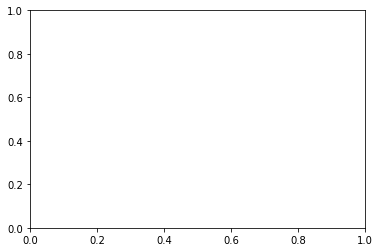

In [76]:
for mouse in ['4139219.2', '4139219.3', '4139224.2', '4139224.3', '4139224.5',
      '4139251.1','4139251.2','4139260.1','4139260.2','4139261.2','4139266.3','4139265.4','4139265.3','4139265.5']:
    f,ax = plt.subplots()
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')|
                       df_mouse['Track'].str.match('Reversal_noTimeout') | df_mouse['Track'].str.match('Reversal') |
                       df_mouse['Track'].str.match('TwoTower_foraging') ]
    print(mouse)
    # take first file
    for i in range(df_mouse.shape[0]):
        sess = df_mouse.iloc[i]
        print(sess)
    # load info file

        info = pp.loadmat_sbx(sess['scanmat'])
        fr = info['resfreq']/info['recordsPerBuffer']
        lr = fr*512.
        info['max_idx'] = int(os.path.getsize(sess['scanmat'][:-3]+'sbx')/info['recordsPerBuffer']/info['sz'][1]*2/4-1)
        print('last indices',info['max_idx'],info['frame'][-1])
        print('first frames', info['frame'][0]/fr + info['line'][0]/lr)
        
        st = info['frame']/fr + info['line']/lr  
        dt_st = np.diff(st)
        
        vr = pp._get_frame(sess['data file'])
        if 'sanning' in vr.columns:
            key = 'sanning'
        elif 'scanning' in vr.columns:
            key = 'scanning'
        else:
            raise Exception("no scanning column")
            
        vr = vr[vr[key]>0]
        vr.time -= vr.time._values[0]
        print(vr[vr.time>9.9].iloc[0:10])
        
        dt_vr = np.diff(vr['time']._values)
        np.amin(dt_vr)
        vrt_r = np.round((vr.time._values-vr['time']._values[-1])*fr)/fr
        
        dt_st = np.insert(dt_st,0,np.amin(dt_vr))
        tmp = np.zeros(dt_st.shape)
        tmp[dt_st<.005]=1
        mask = np.insert(np.diff(tmp),0,0)
        mask[mask<0]=0
        
        st_clean = info['frame']/fr
        st_clean = st_clean[mask==0]
        print(st_clean.shape,st.shape)

            
#         bof = info['frame'].shape[0]
#         ax.plot(vrt_r[-1:-bof:-1000]-st_r[-1:-bof:-1000])
#         ff,aax = plt.subplots()
#         aax.scatter(dt_st[-1:-bof:-100],dt_vr[-1:-bof:-100])
#         print('num frames', bof) 
         
        print('bof')
        bof = info['frame'].shape[0]
        print(vr.iloc[-bof:-bof+2])
        clean_bof = st_clean.shape[0]
        if bof!=clean_bof:
            print(vr.iloc[-clean_bof:-clean_bof+2])
#         
#         for j in range(30):
#             print(vrt_r[-bof+j],st_r[-bof+j])
            

        # find time of first pulse

        # find closest VR time (first scanning=1 frame is time 0)

        # take second to last scan frame

        # take second to last vr frame
             
            
            
       
    
# # calculate inter TTL interval on scanning computer
# scanTime = info['frame']/fr + info['line']/lr
# dt_scanTime = np.diff(scanTime)
# print(scanTime.shape)

# # calculate inter frame interval on VR computer
# vr = pp._get_frame(sess['data file'])
# dt_vr = np.diff(vr['time']._values)
# # look at last ttl to see what the dealio is
    
# calculate average time between VR clock time and 

In [85]:
for mouse in ['4139251.1']: #,'4139251.2','4139260.1','4139260.2','4139261.2','4139266.3','4139265.4','4139265.3','4139265.5']:
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')|
                       df_mouse['Track'].str.match('Reversal_noTimeout') | df_mouse['Track'].str.match('Reversal') |
                       df_mouse['Track'].str.match('TwoTower_foraging') ]
    print(mouse)
    # take first file
    for i in range(1) : #df_mouse.shape[0]):
        sess = df_mouse.iloc[i]
        print(sess)
    # load info file

        info = pp.loadmat_sbx(sess['scanmat'])
        fr = info['resfreq']/info['recordsPerBuffer']
        lr = fr*512.
        info['max_idx'] = int(os.path.getsize(sess['scanmat'][:-3]+'sbx')/info['recordsPerBuffer']/info['sz'][1]*2/4-1)
        
        st = info['frame']/fr + info['line']/lr  
        dt_st = np.diff(st)
        
        vr_dframe = pp._get_frame(sess['data file'])
        
        orig_ttl_times = info['frame']/fr + info['line']/lr # including error ttls
        dt_ttl = np.diff(np.insert(orig_ttl_times,0,0)) # insert zero at beginning and calculate delta ttl time
        tmp = np.zeros(dt_ttl.shape)
        tmp[dt_ttl<.005] = 1 # find ttls faster than 200 Hz (unrealistically fast - probably a ttl which bounced to ground)
        # ensured outside of this script that this finds the true start ttl on every scan
        mask = np.insert(np.diff(tmp),0,0) # find first ttl in string that were too fast
        mask[mask<0] = 0

        frames = info['frame'][mask==0] # should be the original ttls up to a 1 VR frame error
        lines = info['line'][mask==0]

        ttl_times = frames/fr + lines/lr
        numVRFrames = frames.shape[0]

        ca_df = pd.DataFrame(columns = frame.columns, index = np.arange(info['max_idx']))
        ca_time = np.arange(0,1/fr*info['max_idx'],1/fr)
        ca_df.loc[:,'time'] = ca_time
        mask = ca_time>=ttl_times[0]

        vr_dframe = vr_dframe.iloc[-numVRFrames:]
        f_mean = sp.interpolate.interp1d(ttl_times,vr_dframe['pos']._values,axis=0,kind='slinear')
        ca_df.loc[mask,'pos'] = f_mean(ca_time[mask])
        ca_df.loc[~mask,'pos']=-500.

        near_list = ['morph','clickOn','towerJitter','wallJitter','bckgndJitter']
        f_nearest = sp.interpolate.interp1d(ttl_times,vr_dframe[near_list]._values,axis=0,kind='nearest')
        ca_df.loc[mask,near_list] = f_nearest(ca_time[mask])
        ca_df.fillna(method='ffill',inplace=True)
        ca_df.loc[~mask,near_list]=-1.

        cumsum_list = ['dz','lick','reward','tstart','teleport']

        f_cumsum = sp.interpolate.interp1d(ttl_times,np.cumsum(vr_dframe[cumsum_list]._values,axis=0),axis=0,kind='slinear')
        ca_cumsum = np.round(np.insert(f_cumsum(ca_time[mask]),0,[0,0, 0 ,0,0],axis=0))
        #print('cumsum',ca_cumsum[-1,:])
        if ca_cumsum[-1,-1]<ca_cumsum[-1,-2]:
            ca_cumsum[-1,-1]+=1
        #print('cumsum',ca_cumsum[-1,:])
        #ca_df[cumsum_list].iloc[1:-underhang+1]=np.diff(ca_cumsum,axis=0


        ca_df.loc[mask,cumsum_list] = np.diff(ca_cumsum,axis=0)
        ca_df.loc[~mask,cumsum_list] = -1.

        # fill na here
        ca_df.loc[np.isnan(ca_df['teleport']._values),'teleport']=0
        ca_df.loc[np.isnan(ca_df['tstart']._values),'tstart']=0


        k = Gaussian1DKernel(5)
        cum_dz = convolve(np.cumsum(ca_df['dz']._values),k,boundary='extend')
        ca_df['dz'] = np.ediff1d(cum_dz,to_end=0)


        ca_df['speed'].interpolate(method='linear',inplace=True)
        ca_df['speed']=np.array(np.divide(ca_df['dz'],np.ediff1d(ca_df['time'],to_begin=1./fr)))
        ca_df['speed'].iloc[0]=0


        ca_df['lick rate'] = np.array(np.divide(ca_df['lick'],np.ediff1d(ca_df['time'],to_begin=1./fr)))
        ca_df['lick rate'] = convolve(ca_df['lick rate']._values,k,boundary='extend')
        ca_df[['reward','tstart','teleport','lick','clickOn','towerJitter','wallJitter','bckgndJitter']].fillna(value=0,inplace=True)

4139251.1
MouseName                                                4139251.1
DateFolder                                              19_01_2019
SessionNumber                                                    1
Track                                           Reversal_noTimeout
RewardCount                                                     60
Imaging                                                          1
ImagingRegion                                                  CA1
DateTime                                       2019-01-19 00:00:00
data file        G:\My Drive\\VR_Data\TwoTower\4139251.1\19_01_...
scanfile                                                      None
scanmat          G:\My Drive\2P_Data\TwoTower\4139251.1\19_01_2...
s2pfolder        G:\My Drive\2P_Data\TwoTower\4139251.1\19_01_2...
Name: 1046, dtype: object


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
